In [2]:
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january',
              2: 'february',
              3: 'march',
              4: 'april',
              5: 'may',
              6: 'june',
              7: 'july',
              8: 'august',
              9: 'september',
              10: 'october',
              11: 'november',
              12: 'december'}

# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

temp.head()

,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,month,mean_month
0,1/1/1948,10,8.0,7.0,january,4.493982
1,1/2/1948,6,4.0,3.0,january,4.493982
2,1/3/1948,7,4.0,2.0,january,4.493982
3,1/4/1948,7,4.0,2.0,january,4.493982
4,1/5/1948,7,3.0,0.0,january,4.493982


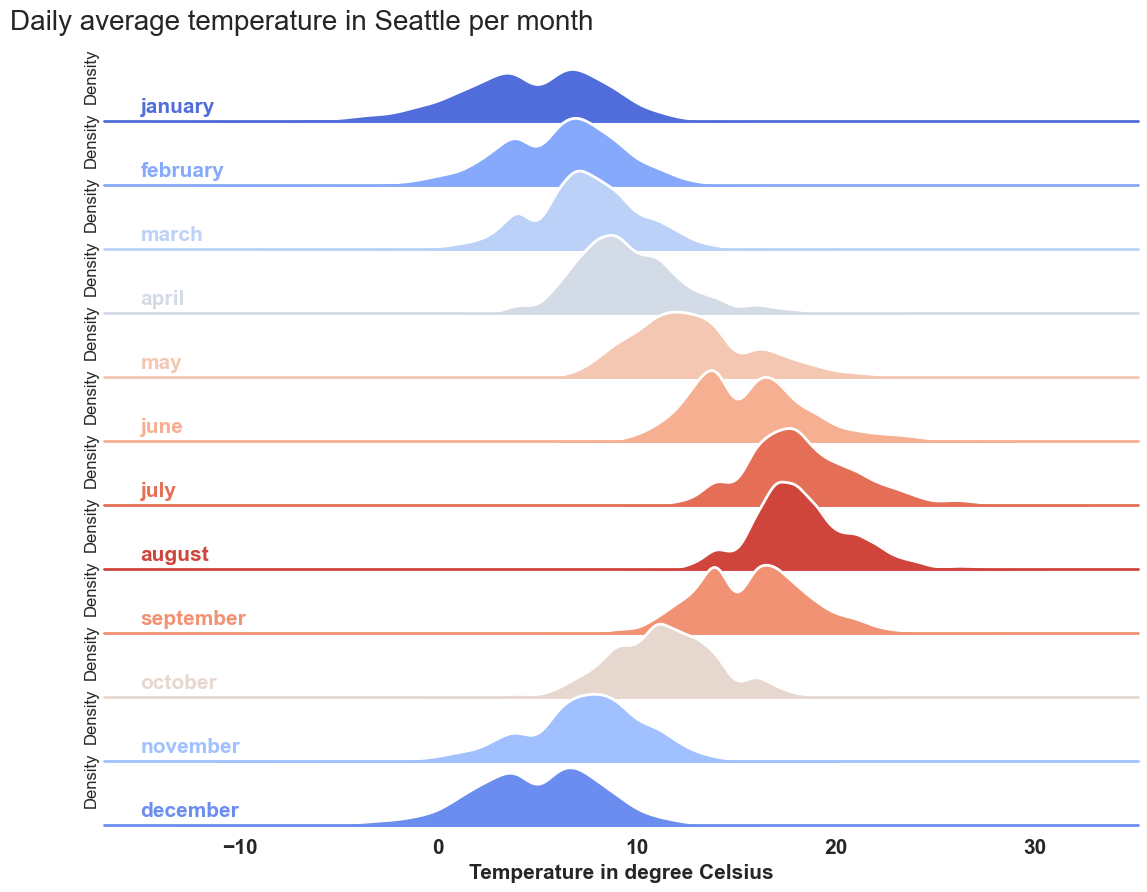

In [5]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()